<a href="https://colab.research.google.com/github/anushna9/Automated-Tweet-Posting-Bot/blob/main/3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy import stats

In [ ]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
data.shape

(500, 9)

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
data['Admitted'] = (data['Chance of Admit '] >= 0.5).astype(int)

In [ ]:

X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y = data['Admitted']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)
X_train.shape

(375, 7)

In [ ]:
X_test.shape

(125, 7)

In [ ]:
Y_train.shape

(375,)

In [ ]:

Y_test.shape

(125,)

In [ ]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
Admitted             0
dtype: int64

In [ ]:
model_gini = DecisionTreeClassifier( random_state = 1, criterion = 'gini', splitter = 'best', max_leaf_nodes = None)
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
model_entropy = DecisionTreeClassifier( random_state = 1, criterion = 'entropy', splitter = 'best', max_leaf_nodes = None)
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
DecisionTreeClassifier(criterion='entropy', random_state=1)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
y_train_g = model_gini.predict(X_train)

In [ ]:
y_test_g = model_gini.predict(X_test)

In [ ]:
y_train_ent = model_gini.predict(X_train)
y_test_ent = model_gini.predict(X_test)

accuracy score:  0.928


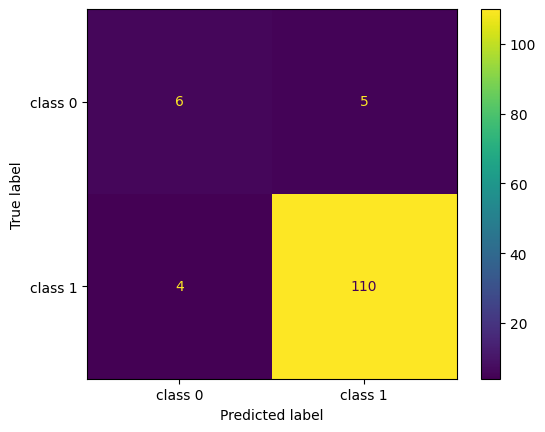

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_test_g, display_labels = [ 'class 0', 'class 1'])
plt.show
print('accuracy score: ', accuracy_score(Y_test, y_test_g))

accuracy score:  1.0


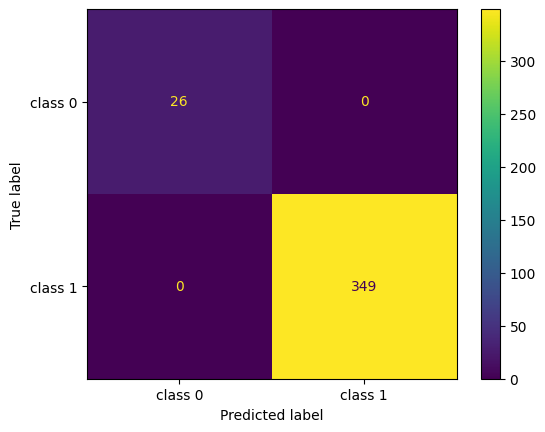

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train,y_train_g, display_labels = [ 'class 0', 'class 1'])
plt.show
print('accuracy score: ', accuracy_score(Y_train, y_train_g))

accuracy score:  0.928


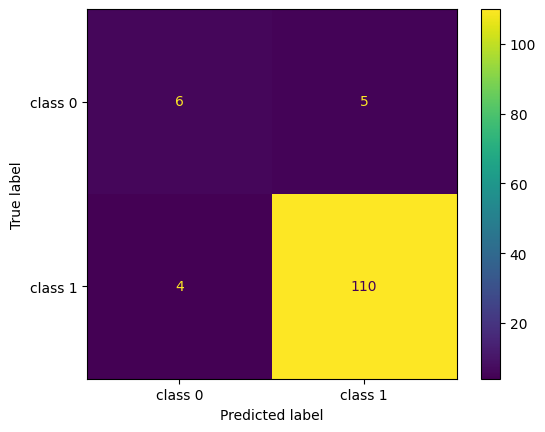

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_test_ent, display_labels = [ 'class 0', 'class 1'])
plt.show
print('accuracy score: ', accuracy_score(Y_test, y_test_ent))

accuracy score:  1.0


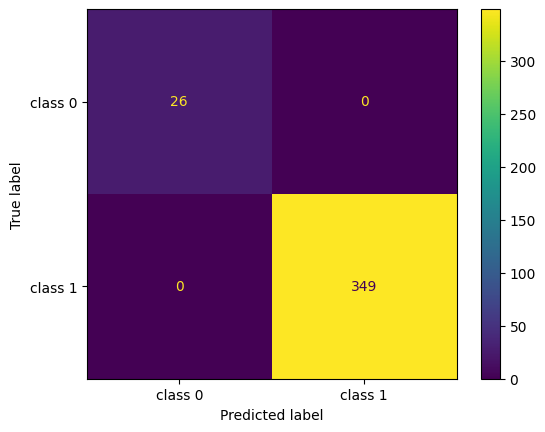

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_train,y_train_ent, display_labels = [ 'class 0', 'class 1'])
plt.show
print('accuracy score: ', accuracy_score(Y_train, y_train_ent))

In [ ]:
print("Confusion matrix training by model based on gini index")
print(classification_report(Y_train, y_train_g));print()
print("Confusion matrix testing by model based on gini index")
print(classification_report(Y_test, y_test_g));print()
print("Confusion matrix training by model based on Entropy")
print(classification_report(Y_train, y_train_g));print()
print("Confusion matrix training by model based on Entropy")
print(classification_report(Y_test, y_test_g));print()

Confusion matrix training by model based on gini index
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       349

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375


Confusion matrix testing by model based on gini index
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.96      0.96      0.96       114

    accuracy                           0.93       125
   macro avg       0.78      0.76      0.77       125
weighted avg       0.93      0.93      0.93       125


Confusion matrix training by model based on Entropy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       349

    accuracy       

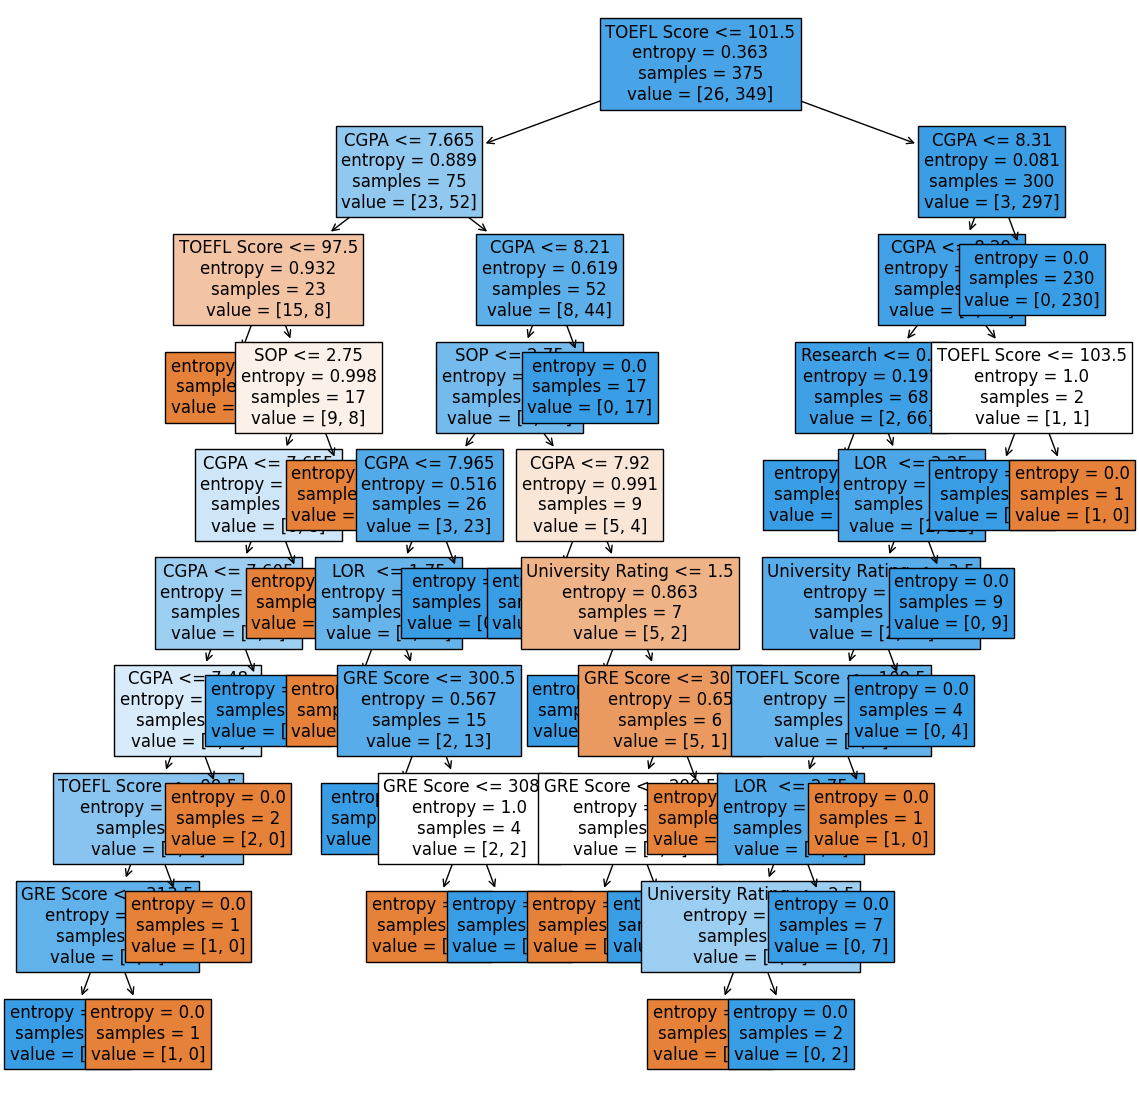

In [ ]:
plt.figure(figsize=(14,14))
plot_tree(model_entropy, fontsize = 12, filled = True, feature_names=list(X.columns));